# Import necessary libraries

In [23]:
# basic funktionality
import matplotlib.pyplot as plt # plotting data
import seaborn as sns # fancy plotting
import os # getting data from Folders
import pandas as pd # Dataframes
import numpy as np # working with arrays
import re # getting information from filenames (targets)

#sklearn basics
from sklearn import metrics # used for analysing training results
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

#splitting and scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#KNN
from sklearn.neighbors import KNeighborsClassifier

#SVM
from sklearn.svm import SVC

#SQL implementation
import pyodbc

#fetch current Date
from datetime import datetime

#unnecessary/redundant
#from sklearn.metrics import accuracy_score
#from sklearn import datasets # toy datasets
#from sklearn.datasets import load_iris # may be unnecessary because datasets is already imported as a whole
#import numpy as np
#import matplotlib.pyplot as plt
#from matplotlib.colors import ListedColormap
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler
#import pandas as pd

# create SQL connection and create Table for A1

In [8]:
# Establish the connection
connection = pyodbc.connect(
    'DRIVER={ODBC Driver 18 for SQL Server};'
    'SERVER=MEINER\SQLEXPRESS;'
    'DATABASE=master;'
    'UID=sa;'
    'PWD=;'
    'TrustServerCertificate=YES;'
    'Encrypt=no'
)

# Create a cursor object
cursor = connection.cursor()

# SQL queries to create tables
create_tab_Kaltumformung_analytics = """
CREATE TABLE tab_Kaltumformung_analytics (
    Date DATE NOT NULL,
    ML_approach VARCHAR(255) NOT NULL,
    Accuracy FLOAT NOT NULL,
    Empty_Empty INT NOT NULL,
    Empty_Half INT NOT NULL,
    Empty_Loaded INT NOT NULL,
    Half_Empty INT NOT NULL,
    Half_Half INT NOT NULL,
    Half_Loaded INT NOT NULL,
    Loaded_Empty INT NOT NULL,
    Loaded_Half INT NOT NULL,
    Loaded_Loaded INT NOT NULL
);
"""

# Execute the query
cursor.execute(create_tab_Kaltumformung_analytics)

# Commit the changes
connection.commit()

# Close the connection
#cursor.close()
#connection.close()

<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:4: SyntaxWarning: invalid escape sequence '\S'
C:\Users\johan\AppData\Local\Temp\ipykernel_13828\3144458155.py:4: SyntaxWarning: invalid escape sequence '\S'
  'SERVER=MEINER\SQLEXPRESS;'
C:\Users\johan\AppData\Local\Temp\ipykernel_13828\3144458155.py:4: SyntaxWarning: invalid escape sequence '\S'
  'SERVER=MEINER\SQLEXPRESS;'


ProgrammingError: ('42S01', '[42S01] [Microsoft][ODBC Driver 18 for SQL Server][SQL Server]In der Datenbank ist bereits ein Objekt mit dem Namen "tab_Kaltumformung_analytics" vorhanden. (2714) (SQLExecDirectW)')

In [9]:
# Base directory
base_dir = "HD1_ID"

# Initialize an empty list to hold all DataFrames
dataframes = []

# Traverse the directory structure
for root, dirs, files in os.walk(base_dir):
    for file in files:
        if file == "HD1_ID_S-0-0084.csv":  # Only process the specific CSV file
            # Full path to the file
            file_path = os.path.join(root, file)
            
            # Extract the target (the immediate subfolder of HD1_ID)
            target = root.split(os.sep)[1]  # Example: 'Empty', 'Half', 'Loaded'
            
            # Read the CSV file
            df = pd.read_csv(file_path, sep=" ", header=None)
            
            # Add the target column
            df["target"] = target
            
            # Append the DataFrame to the list
            dataframes.append(df)

# Combine all DataFrames into a single DataFrame
final_df = pd.concat(dataframes, ignore_index=True)
df = final_df

In [10]:
df.head()

0     1     2     3     4     5     6     7     8     9  ...  8183  \
0 -10.8 -11.0 -10.7 -10.8 -10.7 -11.1 -11.2 -11.0 -10.7 -10.9  ... -15.0   
1  -9.9  -9.8  -9.6  -9.6  -9.5  -9.8  -9.8  -9.7  -9.9  -9.8  ... -14.5   
2  -9.8 -10.0 -10.1 -10.6 -10.2 -10.1  -9.6  -9.8  -9.8  -9.9  ... -14.9   
3  -9.5  -9.8  -9.8  -9.8  -9.9  -9.9  -9.7  -9.5  -9.8  -9.7  ... -15.1   
4 -10.1 -10.1 -10.0 -10.2  -9.9  -9.9  -9.7 -10.0 -10.0  -9.7  ... -16.1   

   8184  8185  8186  8187  8188  8189  8190  8191  target  
0 -15.4 -15.1 -14.9 -14.8 -15.1 -15.1 -15.0 -15.2   Empty  
1 -14.4 -14.1 -14.2 -14.1 -14.0 -14.3 -14.5 -14.5   Empty  
2 -14.5 -14.8 -14.6 -14.8 -15.1 -14.8 -14.8 -14.7   Empty  
3 -15.1 -15.0 -15.2 -15.2 -14.9 -14.9 -14.7 -14.8   Empty  
4 -16.0 -16.1 -15.8 -15.6 -15.8 -15.6 -15.9 -15.8   Empty  

[5 rows x 8193 columns]

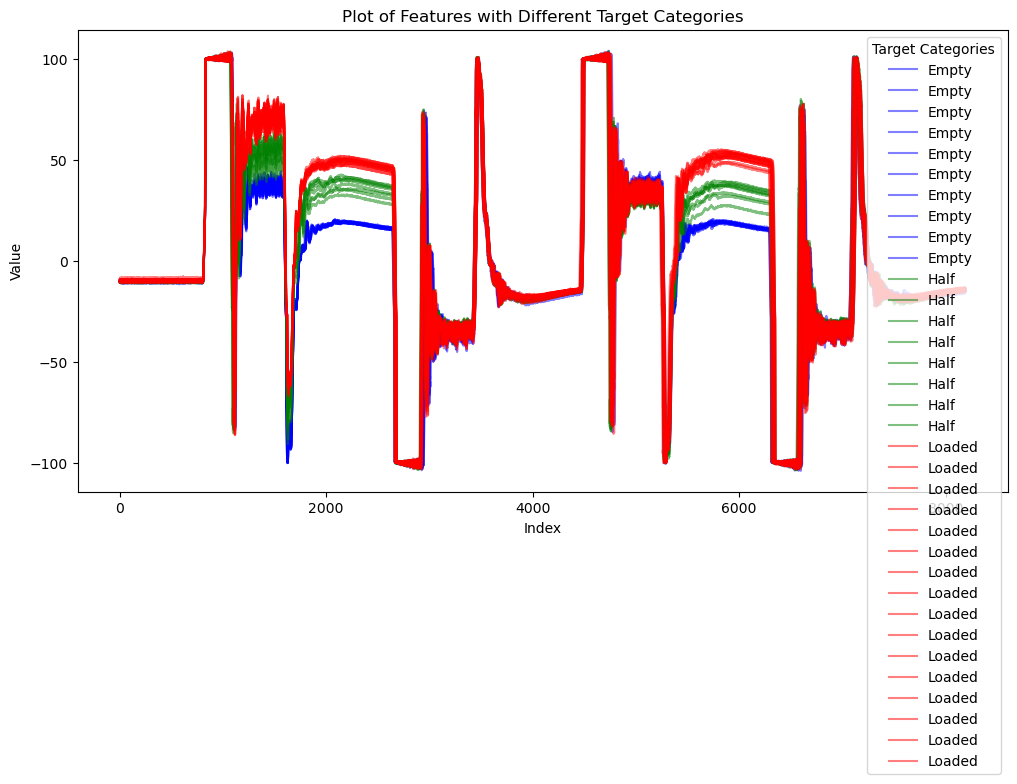

In [11]:
# Define a color map for the targets
color_map = {
    'Empty': 'blue',
    'Half': 'green',
    'Loaded': 'red'
}

# Create the plot
plt.figure(figsize=(12, 6))

# Plot each target category with a different color
for target, color in color_map.items():
    subset = final_df[final_df['target'] == target]
    
    # Loop over each row and plot the values
    for index, row in subset.iterrows():
        x = range(len(row) - 1)  # Exclude the 'target' column for X-axis (using column indices)
        y = row[:-1]  # Exclude the 'target' column for Y-axis (using the actual values)
        plt.plot(x, y, label=target, color=color, alpha=0.5)  # Plot each line with alpha for transparency

# Add labels and a title
plt.xlabel('Index')  # X-axis label (Index of each vertical line)
plt.ylabel('Value')  # Y-axis label (Value of each feature)
plt.title('Plot of Features with Different Target Categories')

# Add a legend
plt.legend(title="Target Categories")

# Show the plot
plt.show()

## Split and scale the data for model training

In [12]:
# Assuming 'df' is your DataFrame and 'target' is the column name for the labels
X = df.drop(columns=["target"])  # Features (all columns except 'target')
y = df["target"]  # Target (the 'target' column)

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (scaling is typically done only on the features, not the target)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)      # why not fit_transform here too?

# Print sizes for verification
print(f'Training set size: {X_train.shape[0]} samples')
print(f'Test set size: {X_test.shape[0]} samples')

Training set size: 23 samples
Test set size: 11 samples


## Train with k nearest neigbors

In [13]:
# Create the KNN classifier
k = 3  # Number of neighbors 3,5,6,7,8,9,10,11,12 ... 24
knn = KNeighborsClassifier(n_neighbors=k)

# Train the classifier
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

       Empty       1.00      1.00      1.00         3
        Half       1.00      1.00      1.00         2
      Loaded       1.00      1.00      1.00         6

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11

[[3 0 0]
 [0 2 0]
 [0 0 6]]


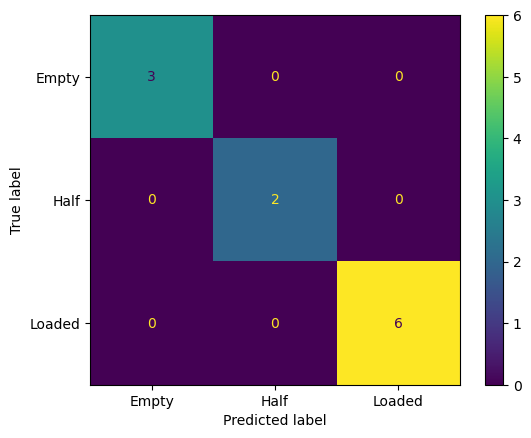

In [14]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=['Empty', 'Half', 'Loaded'])
print("Classification Report:\n", report)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
# Plot the confusion matrix

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ['Empty','Half','Loaded'])

cm_display.plot()
plt.show()

# write data to database

In [22]:
# Create a cursor object
cursor = connection.cursor()

# Insert data into the table
# Get today's date in EU format
date = datetime.now().strftime('%d.%m.%Y')
ml_approach = 'KNN'

#accuracy = accuracy

# Map the confusion matrix into corresponding columns
empty_empty = int(conf_matrix[0][0])
empty_half = int(conf_matrix[0][1])
empty_loaded = int(conf_matrix[0][2])
half_empty = int(conf_matrix[1][0])
half_half = int(conf_matrix[1][1])
half_loaded = int(conf_matrix[1][2])
loaded_empty = int(conf_matrix[2][0])
loaded_half = int(conf_matrix[2][1])
loaded_loaded = int(conf_matrix[2][2])

print(type(empty_empty))

# SQL query to insert data
insert_query = """
INSERT INTO tab_Kaltumformung_analytics (
    Date, ML_approach, Accuracy, 
    Empty_Empty, Empty_Half, Empty_Loaded, 
    Half_Empty, Half_Half, Half_Loaded, 
    Loaded_Empty, Loaded_Half, Loaded_Loaded
) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
"""

# Execute the query
cursor.execute(insert_query, (
    date, ml_approach, accuracy,
    empty_empty, empty_half, empty_loaded,
    half_empty, half_half, half_loaded,
    loaded_empty, loaded_half, loaded_loaded
))



# Commit the transaction
connection.commit()

<class 'int'>


## SVM

In [8]:
# Create the SVM classifier
svm = SVC(kernel='linear', C=1, random_state=42)

# Train the classifier
svm.fit(X_train, y_train)

# Make predictions
y_pred = svm.predict(X_test)

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

       Empty       1.00      1.00      1.00         3
        Half       1.00      1.00      1.00         2
      Loaded       1.00      1.00      1.00         6

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11

[[3 0 0]
 [0 2 0]
 [0 0 6]]


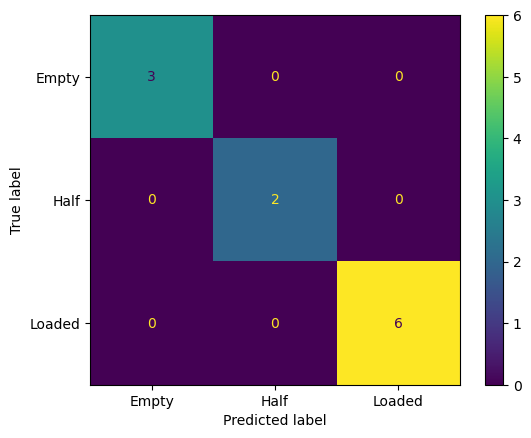

In [9]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=['Empty', 'Half', 'Loaded'])
print("Classification Report:\n", report)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)


print (conf_matrix)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ['Empty', 'Half', 'Loaded'])

cm_display.plot()
plt.show()

# A2

In [10]:
# Function to split a row into multiple sections
def split_row(row, num_sections):
    section_length = len(row) // num_sections
    return [row[i * section_length: (i + 1) * section_length] for i in range(num_sections)]

# Path to the folder containing .dat files
base_dir_a2 = "01_material02"

# Initialize an empty dictionary
dataframes_a2 = []

# Iterate over all .dat files in the folder
for file_name in os.listdir(base_dir_a2):
    if file_name.endswith(".dat"):
        # Construct the full file path
        file_path = os.path.join(base_dir_a2, file_name)
        
        # Read the file into a pandas DataFrame
        df_a2 = pd.read_csv(file_path, delimiter=';', header=None, decimal=',').transpose()

        # extract second colomn
        df_a2 = df_a2.drop(index = 0)
        
        # delete fist few datapoints
        df_a2 = df_a2.iloc[:, 100:]

        # Number of columns to extract
        num_columns_to_extract = 6700
        # Number of sections to split each row into
        num_sections = 9

        # Extract first 6600 columns and split each row
        result = []
        for _, row in df_a2.iloc[:, :num_columns_to_extract].iterrows():
            sections = split_row(row.values, num_sections)
            result.extend(sections)

        # Create a new DataFrame with the sections as rows
        df_a2 = pd.DataFrame(result)

        # Extract the target
        match = re.search(r"_(\w+)\.dat$", file_path)
        target_a2 = match.group(1)
        #print(target)
        
        # Add the target column
        df_a2["target"] = target_a2
        
        # Append the DataFrame to the list
        dataframes_a2.append(df_a2)
        
        #print(df_a2)

# Combine all DataFrames into a single DataFrame
df_a2 = pd.concat(dataframes_a2, ignore_index=True)

In [11]:
#display(df_a2)
df_a2.head()

0      1      2      3      4      5      6      7      8      9  ...  \
0  0.002  0.002  0.005  0.004  0.000  0.005  0.002  0.002  0.003  0.003  ...   
1  0.003  0.003  0.002  0.001  0.006  0.004  0.002  0.004  0.003  0.004  ...   
2  0.005  0.004  0.001  0.003  0.002  0.004  0.004  0.003  0.002  0.004  ...   
3  0.003  0.003  0.004  0.003  0.002  0.004  0.005  0.000  0.007  0.005  ...   
4  0.004  0.000  0.006  0.004  0.005  0.004  0.005  0.003  0.005  0.003  ...   

     735    736    737    738    739    740    741    742    743  target  
0  0.005  0.004  0.000  0.005  0.002  0.002  0.002  0.003  0.002   steel  
1  0.002  0.002  0.003  0.004  0.003  0.004  0.004  0.003  0.001   steel  
2  0.003  0.004  0.004  0.003  0.001  0.005  0.004  0.001  0.004   steel  
3  0.001  0.004  0.003  0.004  0.004  0.003  0.001  0.003  0.005   steel  
4  0.001  0.003  0.004  0.004  0.001  0.006  0.004  0.005  0.004   steel  

[5 rows x 745 columns]

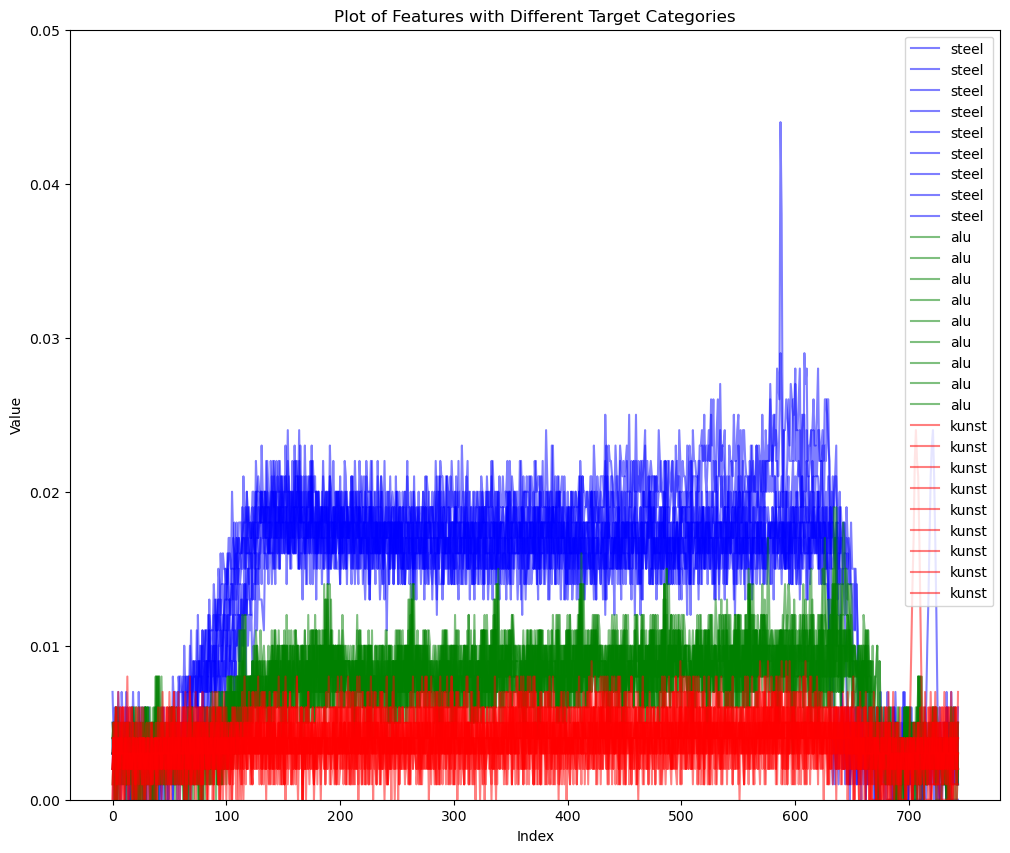

In [12]:
# Define a color map for the targets
color_map_a2 = {
    'steel': 'blue',
    'alu': 'green',
    'kunst': 'red'
}

# Create the plot
plt.figure(figsize=(12, 10))
plt.ylim(0, 0.05)

# Plot each target category with a different color
for target_a2, color in color_map_a2.items():
    subset = df_a2[df_a2['target'] == target_a2]
    
    # Loop over each row and plot the values
    for index, row in subset.iterrows():
        x = range(len(row) - 1)  # Exclude the 'target' column for X-axis (using column indices)
        y = row[:-1]  # Exclude the 'target' column for Y-axis (using the actual values)
        plt.plot(x, y, label=target_a2, color=color, alpha=0.5)  # Plot each line with alpha for transparency

# Add labels and a title
plt.xlabel('Index')  # X-axis label (Index of each vertical line)
plt.ylabel('Value')  # Y-axis label (Value of each feature)
plt.title('Plot of Features with Different Target Categories')

# Add a legend
plt.legend(title="Target Categories")
plt.legend(loc='upper right')  # Move the legend to the upper-right corner

# Show the plot
plt.show()

## spliting and scaling dataset

In [13]:
# Assuming 'df' is your DataFrame and 'target' is the column name for the labels
X_a2 = df_a2.drop(columns=["target"])  # Features (all columns except 'target')
y_a2 = df_a2["target"]  # Target (the 'target' column)

# Split the dataset into training and testing sets (70% train, 30% test)
X_train_a2, X_test_a2, y_train_a2, y_test_a2 = train_test_split(X_a2, y_a2, test_size=0.3, random_state=40)

# Standardize the features (scaling is typically done only on the features, not the target)
scaler_a2 = StandardScaler()
X_train_a2 = scaler_a2.fit_transform(X_train_a2)
X_test_a2 = scaler_a2.transform(X_test_a2)      # why not fit_transform here too?

# Print sizes for verification
print(f'Training set size: {X_train_a2.shape[0]} samples')
print(f'Test set size: {X_test_a2.shape[0]} samples')

Training set size: 18 samples
Test set size: 9 samples


## KNN

In [14]:
# Create the KNN classifier
k_a2 = 3  # Number of neighbors 3,5,6,7,8,9,10,11,12 ... 24
knn_a2 = KNeighborsClassifier(n_neighbors=k_a2)

# Train the classifier
knn_a2.fit(X_train_a2, y_train_a2)

# Make predictions
y_pred_a2 = knn_a2.predict(X_test_a2)

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

       steel       1.00      1.00      1.00         4
         alu       1.00      1.00      1.00         3
       kunst       1.00      1.00      1.00         2

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

[[4 0 0]
 [0 3 0]
 [0 0 2]]


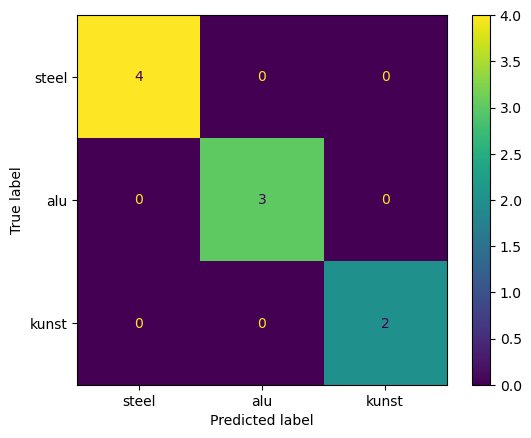

In [15]:
# Evaluate the classifier
accuracy_a2 = accuracy_score(y_test_a2, y_pred_a2)
print("Accuracy:", accuracy_a2)

# Generate the classification report
report_a2 = classification_report(y_test_a2, y_pred_a2, target_names=['steel', 'alu', 'kunst'])
print("Classification Report:\n", report_a2)

# Generate the confusion matrix
conf_matrix_a2 = confusion_matrix(y_test_a2, y_pred_a2)
print(conf_matrix_a2)
# Plot the confusion matrix

cm_display_a2 = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix_a2, display_labels = ['steel', 'alu', 'kunst'])

cm_display_a2.plot()
plt.show()

## SVM

In [16]:
# Create the SVM classifier
svm_a2 = SVC(kernel='linear', C=1, random_state=42)

# Train the classifier
svm_a2.fit(X_train_a2, y_train_a2)

# Make predictions
y_pred_a2 = svm_a2.predict(X_test_a2)

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

       steel       1.00      1.00      1.00         4
         alu       1.00      1.00      1.00         3
       kunst       1.00      1.00      1.00         2

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

[[4 0 0]
 [0 3 0]
 [0 0 2]]


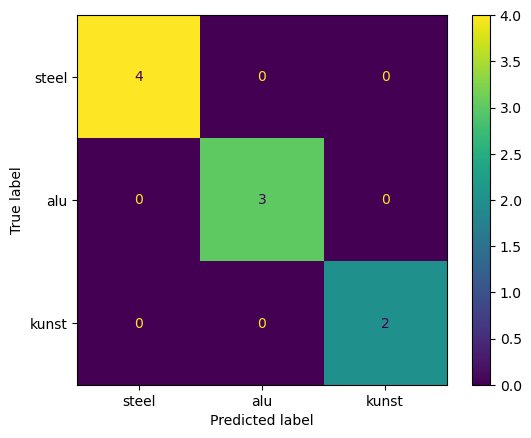

In [17]:
# Evaluate the classifier
accuracy_a2 = accuracy_score(y_test_a2, y_pred_a2)
print("Accuracy:", accuracy_a2)

# Generate the classification report
report_a2 = classification_report(y_test_a2, y_pred_a2, target_names=['steel', 'alu', 'kunst'])
print("Classification Report:\n", report_a2)

# Generate the confusion matrix
conf_matrix_a2 = confusion_matrix(y_test_a2, y_pred_a2)


print (conf_matrix_a2)

cm_display_a2 = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix_a2, display_labels = ['steel', 'alu', 'kunst'])

cm_display_a2.plot()
plt.show()

# SQL

In [ ]:
# Establish the connection
connection = pyodbc.connect(
    'DRIVER={ODBC Driver 18 for SQL Server};'
    'SERVER=MEINER\SQLEXPRESS;'
    'DATABASE=master;'
    'UID=sa;'
    'PWD=dasisteinlangespasswortmit4444zahlen;'
    'TrustServerCertificate=YES;'
    'Encrypt=no'
)

# Create a cursor object to interact with the database
cursor = connection.cursor()

# fetch 10 rows from table Persons
cursor.execute('SELECT TOP 10 * FROM Persons')

rows = cursor.fetchall()
for row in rows:
    print(row)

# Execute a simple query
cursor.execute('SELECT @@version;')

create_table_query = """
CREATE TABLE new_table2 (
    column1 INT NOT NULL,
    column2 VARCHAR(255) NOT NULL
);"""
# Execute the query
cursor.execute(create_table_query)

# Commit the changes
connection.commit()

#print(cursor.fetchone())

# Close the cursor and connection
cursor.close()
connection.close()

In [ ]:
#Create Table
